<a href="https://colab.research.google.com/github/SeunghyeChae/Pneumonia-Detection_tmdhey/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

# contrast 

In [ ]:
def contrast_roi(img, low, high):
    h, w = img.shape 
    img_ = np.zeros(img.shape, dtype=np.uint8)     # 이미지랑 같은 scale의 배열 (흰색)
    for y in range(h): 
        for x in range(w):
            temp = int((255 / (high - low)) * (img[y][x] - low))
            if temp > 255:
                img_[y][x] = 255
            elif temp < 0:
                img_[y][x] = 0
            else:
                img_[y][x] = temp
    return img_


# brightness


In [3]:
def bright_ness(img):
  cols, rows = img.shape[:2]
  brightness = np.sum(img) / (255 * cols * rows)
  return brightness

# 선명도

Text(0.5, 1.0, 'Sharp Image')

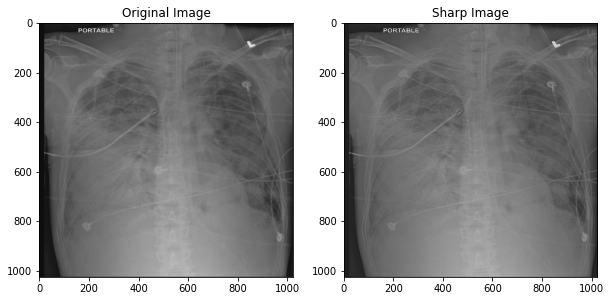

In [75]:
img = cv2.imread('/content/drive/MyDrive/3차플젝drive/img_sample/penumonia/6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= img.copy()

kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(img2, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

Text(0.5, 1.0, 'Sharp Image_3')

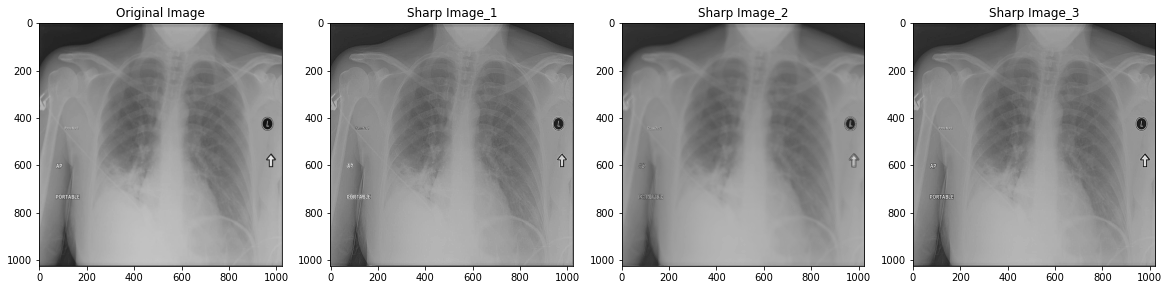

In [84]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/3차플젝drive/img_sample/penumonia/6c3c8214-b6cf-4dc8-934a-56e5c7a82072.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2= img.copy()

kernel_sharpen_1 = np.array([[-1,-1,-1],
                             [-1,9,-1],
                             [-1,-1,-1]]) #정규화를 하지 않은 이유는 모든 값을 다 더하면 1이되기때문에 1로 나눈것과 같은 효과
kernel_sharpen_2 = np.array([[1,1,1],
                             [1,-7,1],
                             [1,1,1]]) #이것도 마찬가지
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]])/8.0 #정규화위해 8로나눔

#applying different kernels to the input image
output_1 = cv2.filter2D(img2,-1,kernel_sharpen_1)
output_2 = cv2.filter2D(img2,-1,kernel_sharpen_2)
output_3 = cv2.filter2D(img2,-1,kernel_sharpen_3)

# cv2.imshow('Sharpening',output_1)
# cv2.imshow('Excessive Sharpening',output_2)
# cv2.imshow('Edge Enhancement',output_3)
# cv2.waitKey()



fig, ax = plt.subplots(1,4, figsize=(20,5))
ax[0].imshow(img2, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(output_1, cmap='gray')
ax[1].set_title('Sharp Image_1')
ax[2].imshow(output_2, cmap='gray')
ax[2].set_title('Sharp Image_2')
ax[3].imshow(output_3, cmap='gray')
ax[3].set_title('Sharp Image_3')

ImportError: ignored

# path 설정


In [4]:

# 이미지 여러개에 함수 적용
import os
path = '/content/drive/MyDrive/3차플젝drive/img_sample/penumonia/'
dir_list = os.listdir(path)
print(dir_list)

['6c1c37f8-f8b4-4412-8dd3-9173e9f264ba.jpg', '6bf5ff1a-07df-4c64-8fdf-dd8a26ab9b5b.jpg', '6bf02e28-807b-4020-a18a-3d34fed0d3aa.jpg', '6bf1ce7c-185c-4f99-869d-8af5c72c1a5e.jpg', '6bd155f1-693f-4343-8d38-dc0d1cd9347b.jpg', '6ba9800e-ebf3-4fd4-9fa7-1022883c4f21.jpg', '6b56a3bd-389f-464c-a506-c20d2a2d5b0d.jpg', '6b013c90-ec73-4a7a-a607-17540c493e0f.jpg', '6b2e1586-e6d6-4df6-89ce-06d8f4698cac.jpg', '6aefeac2-d497-47c9-939d-5558d039ae1a.jpg', '6b1c5aa9-639f-46c5-91c9-186952430ee7.jpg', '6ae4184c-07b8-456d-8a73-e204b7a3cf6f.jpg', '6ad6525d-5225-4623-9f5a-65816cc3436f.jpg', '6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg', '6ab804bc-484c-4419-b791-d2ebada36138.jpg', '6c3c8214-b6cf-4dc8-934a-56e5c7a82072.jpg']


In [ ]:

# 빼고싶은 개수만큼 [:x] 로 적어주세요
for item in dir_list[0:4] :   
  img = cv2.imread(path+'/'+f'{item}',cv2.IMREAD_COLOR)
  img= merong(img,60,55,25,10) 

  cv2.imwrite(f'/content/drive/MyDrive/3차플젝drive/img_sample/penumonia/pp_finish/{item}',img ) #전처리 완료 저장

# 연습

In [5]:
# 이미지 1개 가져오기
from google.colab import files
uploaded = files.upload()

Saving 6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg to 6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg


In [28]:
img = cv2.imread('6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg',cv2.IMREAD_COLOR)

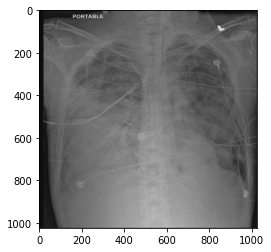

In [95]:
img = cv2.imread('/content/drive/MyDrive/3차플젝drive/img_sample/penumonia/6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,'gray')
plt.show()

In [62]:
def pp(img):
  img1= img.copy()

  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  # clahe
  def clahe(img, clipLimit =0 , tileGridSize = (0,0)):
    clahe = cv2.createCLAHE(clipLimit,tileGridSize)
    img = clahe.apply(img)
    return img

  img1= clahe(img1,5.5,(5,5))

  plt.imshow(img1,'gray')
  plt.show()

In [60]:
import os
path = '/content/drive/MyDrive/3차플젝drive/img_sample/penumonia'
dir_list = os.listdir(path)
print(dir_list)

['6c1c37f8-f8b4-4412-8dd3-9173e9f264ba.jpg', '6bf5ff1a-07df-4c64-8fdf-dd8a26ab9b5b.jpg', '6bf02e28-807b-4020-a18a-3d34fed0d3aa.jpg', '6bf1ce7c-185c-4f99-869d-8af5c72c1a5e.jpg', '6bd155f1-693f-4343-8d38-dc0d1cd9347b.jpg', '6ba9800e-ebf3-4fd4-9fa7-1022883c4f21.jpg', '6b56a3bd-389f-464c-a506-c20d2a2d5b0d.jpg', '6b013c90-ec73-4a7a-a607-17540c493e0f.jpg', '6b2e1586-e6d6-4df6-89ce-06d8f4698cac.jpg', '6aefeac2-d497-47c9-939d-5558d039ae1a.jpg', '6b1c5aa9-639f-46c5-91c9-186952430ee7.jpg', '6ae4184c-07b8-456d-8a73-e204b7a3cf6f.jpg', '6ad6525d-5225-4623-9f5a-65816cc3436f.jpg', '6ad63e9f-6f28-4c3c-8032-26d5bf2fdf95.jpg', '6ab804bc-484c-4419-b791-d2ebada36138.jpg', '6c3c8214-b6cf-4dc8-934a-56e5c7a82072.jpg', 'pp_finish', '.ipynb_checkpoints']


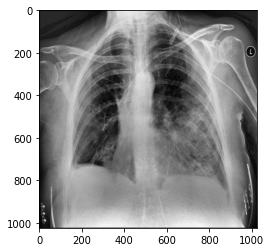

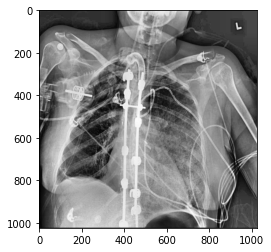

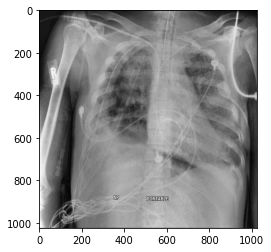

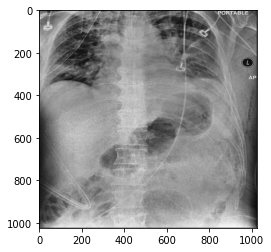

In [63]:

# 빼고싶은 개수만큼 [:x] 로 적어주세요
for item in dir_list[0:4] :   
  img = cv2.imread(path+'/'+f'{item}',cv2.IMREAD_COLOR)
  pp(img)
  # cv2.imwrite(f'/content/drive/MyDrive/3차플젝drive/img_sample/penumonia/pp_finish/{item}',img ) #전처리 완료 저장